In [113]:
#### Import libraries and dependencies #########
import sys
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
from itertools import groupby

In [114]:
cd '/content/drive/MyDrive/Data Developer'

/content/drive/MyDrive/Data Developer


In [115]:
ls

Cedar_Exercise_2.ipynb       input.tsv       proteins.fasta.fai
Cedar-Sinai-Exercise1.ipynb  newfileout      sc.py
ExampleData.txt              proteins.fasta


In [116]:
data = pd.read_csv('ExampleData.txt', sep='\t')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7702 entries, 0 to 7701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   protein_id   7702 non-null   object 
 1   control_1    2814 non-null   float64
 2   control_2    2874 non-null   float64
 3   control_3    2615 non-null   float64
 4   treatment_1  2963 non-null   float64
 5   treatment_2  2800 non-null   float64
 6   treatment_3  2628 non-null   float64
dtypes: float64(6), object(1)
memory usage: 421.3+ KB


In [118]:
data.isnull().sum()

protein_id        0
control_1      4888
control_2      4828
control_3      5087
treatment_1    4739
treatment_2    4902
treatment_3    5074
dtype: int64

In [119]:
## Drop all null values
data1 = data.dropna()

In [120]:
data1.shape

(1145, 7)

In [121]:
data1 = data1.reset_index(drop=True)

In [122]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   protein_id   1145 non-null   object 
 1   control_1    1145 non-null   float64
 2   control_2    1145 non-null   float64
 3   control_3    1145 non-null   float64
 4   treatment_1  1145 non-null   float64
 5   treatment_2  1145 non-null   float64
 6   treatment_3  1145 non-null   float64
dtypes: float64(6), object(1)
memory usage: 62.7+ KB


In [123]:
## The Distribution and Quantiles of each numeric column
data1.describe()

,control_1,control_2,control_3,treatment_1,treatment_2,treatment_3
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,1.455744,1.369763,1.426487,1.398963,1.358221,1.032734
std,2.534017,2.375663,2.384100,2.588912,2.309086,1.784303
min,0.005800,0.005600,0.001100,0.005000,0.004200,0.003400
25%,0.327600,0.310100,0.329900,0.318000,0.310000,0.232100
50%,0.732800,0.693600,0.724700,0.695900,0.684400,0.505900
75%,1.530300,1.456700,1.564000,1.399800,1.391200,1.061700
max,31.943800,31.697400,31.319700,41.685600,28.234200,21.428200


In [124]:
data1.head(3)

,protein_id,control_1,control_2,control_3,treatment_1,treatment_2,treatment_3
0,P38606,0.8114,0.8575,1.0381,0.6448,0.7190,0.4805
1,P18077,0.3672,0.3853,0.4091,0.4109,0.4634,0.3561
2,P35580,2.9815,4.6176,2.8709,7.1670,2.0052,0.8995


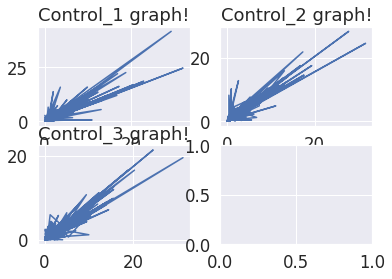

In [125]:
## Plot control measure against the corresponding treatment 

# importing the required module
import matplotlib.pyplot as plt

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Control and treatment 1
axis[0, 0].plot(data1.control_1, data1.treatment_1)
axis[0, 0].set_title("Control_1 graph!")
  
# For Control and treatment 2
axis[0, 1].plot(data1.control_2, data1.treatment_2)
axis[0, 1].set_title("Control_2 graph!")
  
# For Control and treatment 3
axis[1, 0].plot(data1.control_3, data1.treatment_3)
axis[1, 0].set_title("Control_3 graph!")
  
# Combine all the operations and display
plt.show()

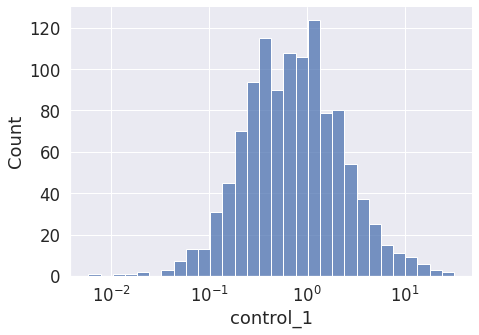

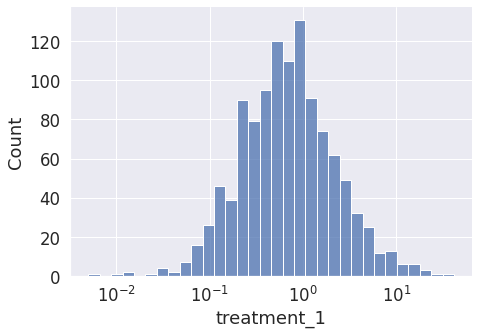

In [126]:
## Histogram on a log scale to know the data distribution

sns.displot(
  data=data1,
  x="control_1",
  kind="hist",
  aspect=1.4,
  log_scale=10
)
sns.displot(
  data=data1,
  x="treatment_1",
  kind="hist",
  aspect=1.4,
  log_scale=10
)

Above plots show us the distribution of effect of control and treatment on each Protein. 
From this we can see that the data is close to a normal distribution.

In [127]:
#Getting new columns with sample difference to know the effect
new_dict = {'protein_id': data1.protein_id , 
            'treat_minus_control1' : data1.treatment_1 - data1.control_1 ,
            'treat_minus_control2': data1.treatment_2 - data1.control_2 , 
            'treat_minus_control3' : data1.treatment_3 - data1.control_3}

new_df =  pd.DataFrame(new_dict)

In [128]:
## Count negative values
new_df1 = new_df[['treat_minus_control1', 'treat_minus_control2' , 'treat_minus_control3']]
new_df1.lt(0).sum()

treat_minus_control1    697
treat_minus_control2    563
treat_minus_control3    907
dtype: int64

In [129]:
new_df1.head(3)

,treat_minus_control1,treat_minus_control2,treat_minus_control3
0,-0.1666,-0.1385,-0.5576
1,0.0437,0.0781,-0.0530
2,4.1855,-2.6124,-1.9714


In [130]:
## Number of positive differences mean that the Treatment was effective upto some extent
a = len(new_df1.query('treat_minus_control1 > 0'))
b = len(new_df1.query('treat_minus_control2 > 0'))
c = len(new_df1.query('treat_minus_control3 > 0'))
print(a, b, c)

446 581 237


In [131]:
## Separating Protiens with Positive treat_minus_control differences
all_positive = new_df[(new_df[['treat_minus_control1', 'treat_minus_control2' , 'treat_minus_control3']] > 0).all(1)]
all_negative = new_df[(new_df[['treat_minus_control1', 'treat_minus_control2' , 'treat_minus_control3']] < 0).all(1)]

In [132]:
control_1_positive = new_df[(new_df[['treat_minus_control1']] > 0).all(1)]
control_2_positive = new_df[(new_df[['treat_minus_control2']] > 0).all(1)]
control_3_positive = new_df[(new_df[['treat_minus_control3']] > 0).all(1)]

In [133]:
print(control_1_positive.shape)
print(control_2_positive.shape)
print(control_3_positive.shape)
print(all_positive.shape)
print(all_negative.shape)

(446, 4)
(581, 4)
(237, 4)
(86, 4)
(315, 4)


### KEY FINDINGS

- From the above attempt to analyze the Control and Treated samples, we can conclude that Treatment 2 has been effective over more number of samples, giving a positive result. 

- Individually, 446 treatments 1s are positive, 581 treatments 2s are positive and 237 treatments 3s are positive.

- There are 86 Proteins that have a positive effect with all three treatments, while there are 315 Proteins which did not show positive effects with any of the three treatments.



